In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import math
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv('/content/carbon_nanotubes.csv',delimiter=";",decimal=",")

# simple data cleaning
df

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373
...,...,...,...,...,...,...,...,...
10716,12,6,0.834201,0.399891,0.891270,0.841858,0.405882,0.891356
10717,12,6,0.698374,0.244710,0.962699,0.706555,0.248416,0.962833
10718,12,6,0.923823,0.568913,0.819842,0.929403,0.576284,0.819879
10719,12,6,0.934978,0.602319,0.938889,0.941844,0.610608,0.938755


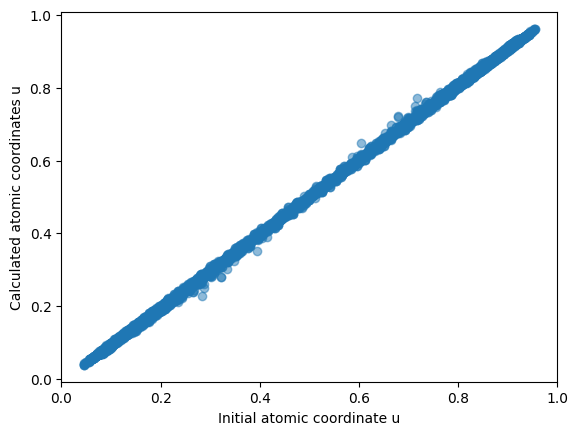

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Initial atomic coordinate u'],df["Calculated atomic coordinates u'"],alpha=0.5)
plt.xlabel('Initial atomic coordinate u')
plt.ylabel("Calculated atomic coordinates u")
plt.show()

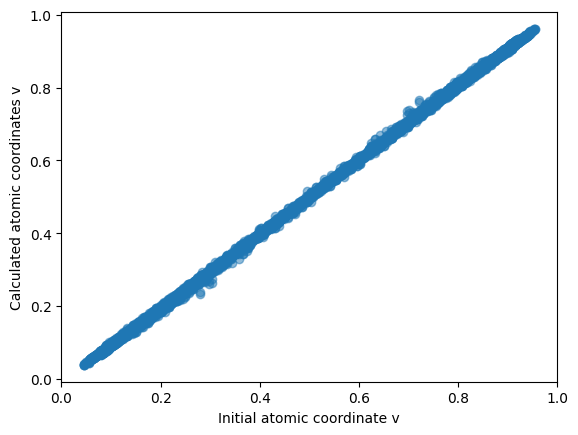

In [ ]:
plt.scatter(df['Initial atomic coordinate v'],df["Calculated atomic coordinates v'"],alpha=0.5)
plt.xlabel('Initial atomic coordinate v')
plt.ylabel("Calculated atomic coordinates v")
plt.show()

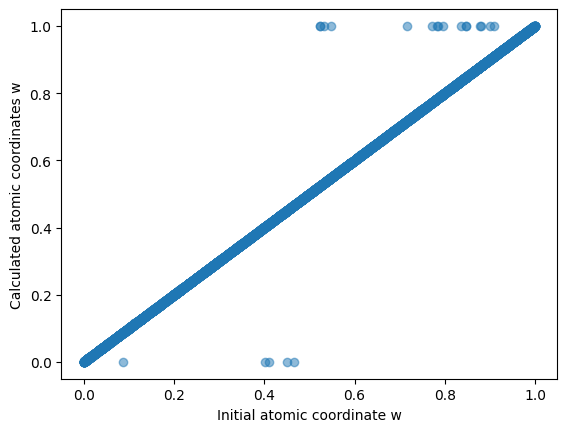

In [ ]:
plt.scatter(df['Initial atomic coordinate w'],df["Calculated atomic coordinates w'"],alpha=0.5)
plt.xlabel('Initial atomic coordinate w')
plt.ylabel("Calculated atomic coordinates w")
plt.show()

In [ ]:

X_set = df[["Chiral indice n","Chiral indice m","Initial atomic coordinate u","Initial atomic coordinate v","Initial atomic coordinate w"]]
y_set = df[["Calculated atomic coordinates u'", "Calculated atomic coordinates v'", "Calculated atomic coordinates w'"]]
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state=42)

# **LINEAR REGRESSION**

In [ ]:


model1=LinearRegression()
model1.fit(X_train,y_train)
lr_y_pred=model1.predict(X_train)
lr_r2_score=r2_score(lr_y_pred,y_train)
mse_lr = mse(y_train,lr_y_pred)
print("r2_score of Linear Regression : ",lr_r2_score)
print("mean square error of Linear Regression : ", mse_lr)
print("root mean square error of Linear Regression : ",math.sqrt(mse_lr))
print(lr_y_pred)

r2_score of Linear Regression :  0.9990530554004003
mean square error of Linear Regression :  7.908761642576763e-05
root mean square error of Linear Regression :  0.008893121860503634
[[0.08670732 0.33190611 0.53816623]
 [0.5519625  0.86560371 0.64437793]
 [0.25648973 0.05818266 0.11020355]
 ...
 [0.84264353 0.8912394  0.81998328]
 [0.48100516 0.17624182 0.5555883 ]
 [0.42431607 0.82619515 0.88122582]]


# **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
model2=Ridge(alpha=0.01)
model2.fit(X_train,y_train)
rr_y_pred=model2.predict(X_train)
rr_r2_score=r2_score(rr_y_pred,y_train)
mse_rr = mse(y_train,rr_y_pred)

print("r2_score of Ridge Regression : ",rr_r2_score)
print("root mean square error of Ridge Regression : ",math.sqrt(mse_rr))
print("mean square error of  Ridge Regression : ",mse_rr)
print(rr_y_pred)

r2_score of Ridge Regression :  0.9990530285802691
root mean square error of Ridge Regression :  0.008893123018592526
mean square error of  Ridge Regression :  7.908763702382025e-05
[[0.08671357 0.33190541 0.53816568]
 [0.55196502 0.86559731 0.64437592]
 [0.25649013 0.05818864 0.11020904]
 ...
 [0.84264078 0.89123525 0.81997881]
 [0.48100251 0.17624786 0.55558756]
 [0.42432063 0.82618823 0.88122047]]


In [ ]:
ridge_hyperparameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
model = model2
ridge_grid_search = GridSearchCV(model, ridge_hyperparameters, cv=5)
ridge_grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", ridge_grid_search.best_params_)
print("Best score: ", ridge_grid_search.best_score_)



Best hyperparameters:  {'alpha': 0.01}
Best score:  0.9990537740184088


# **LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso


model3=Lasso(alpha=0.01,max_iter=1000)
model3.fit(X_train,y_train)
ls_y_pred=model3.predict(X_train)
ls_r2_score=r2_score(ls_y_pred,y_train)
mse_ls = mse(y_train,ls_y_pred)

print("r2_score of Lasso Regression : ",ls_r2_score)
print("mean square error of Lasso Regression ",mse_ls)
print("root mean square error of Lasso Regression : ",math.sqrt(mse_ls))
print(ls_y_pred)

r2_score of Lasso Regression :  0.9801927335947643
mean square error of Lasso Regression  0.0012915835745796135
root mean square error of Lasso Regression :  0.03593860841184051
[[0.13643609 0.35243813 0.53367669]
 [0.54516604 0.82193815 0.62700192]
 [0.28678097 0.11161777 0.1568551 ]
 ...
 [0.80115702 0.84421723 0.78197613]
 [0.48403204 0.2149736  0.54966015]
 [0.4327236  0.78720106 0.83520354]]


In [ ]:
lasso_hyperparameters ={'alpha': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 5000, 10000]}
model = model3
lasso_grid_search = GridSearchCV(model, lasso_hyperparameters, cv=5)
lasso_grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", lasso_grid_search.best_params_)
print("Best score: ", lasso_grid_search.best_score_)



Best hyperparameters:  {'alpha': 0.01, 'max_iter': 1000}
Best score:  0.9846678085538819


In [ ]:
print("LINEAR REGRESSION : ",lr_r2_score)
print("RIDGE REGRESSION : ",ridge_grid_search.best_score_)
print("LASSO REGRESSION : ",lasso_grid_search.best_score_)
print("Ridge Regression model performed slightly better than the other two models wo",max(lr_r2_score,ridge_grid_search.best_score_,lasso_grid_search.best_score_))

LINEAR REGRESSION :  0.9990530554004003
RIDGE REGRESSION :  0.9990537740184088
LASSO REGRESSION :  0.9846678085538819
0.9990537740184088
